# Prefect Example

This is an example in the notebook.

In [1]:
from prefect import Flow, task

from darts import models
import pandas as pd

from soam.forecaster import Forecaster
from soam.savers.csv_saver import CSVSaver

In [2]:
@task
def crete_model():
    my_model = models.Prophet(weekly_seasonality=False, daily_seasonality=False)
    forecaster = Forecaster(my_model)
    return forecaster

In [16]:
@task
def read_csv():
    return pd.read_csv("./example_retail_sales.csv")

In [17]:
@task
def forecast_save(forecaster, retail_dataset):
    prediction = forecaster.run(raw_series=retail_dataset, output_length=7)
    return prediction.to_csv("./example_retail_predictions.csv", index=False)

In [18]:
with Flow("my_pipeline") as f:
    model = crete_model()
    data = read_csv()
    forecasted = forecast_save(model,data)
    print(forecasted)

<Task: forecast_save>


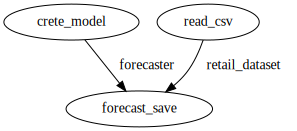

In [19]:
f.visualize()

In [20]:
f.run()

[2020-08-24 18:57:04] INFO - prefect.FlowRunner | Beginning Flow run for 'my_pipeline'
[2020-08-24 18:57:04] INFO - prefect.TaskRunner | Task 'crete_model': Starting task run...
[2020-08-24 18:57:04] INFO - prefect.TaskRunner | Task 'crete_model': finished task run for task with final state: 'Success'
[2020-08-24 18:57:04] INFO - prefect.TaskRunner | Task 'read_csv': Starting task run...
[2020-08-24 18:57:04] INFO - prefect.TaskRunner | Task 'read_csv': finished task run for task with final state: 'Success'
[2020-08-24 18:57:04] INFO - prefect.TaskRunner | Task 'forecast_save': Starting task run...
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
[2020-08-24 18:57:08] INFO - prefect.TaskRunner | Task 'forecast_save': finished task run for task with final state: 'Success'
INFO:prefect.TaskRunner:Task 'forecast_save': finished task run for task with final state: 'Success'
[2020-08-24 18:57:08] INFO - prefect.FlowRunner | Flow run SUCCESS: all reference tasks succeeded
INFO:prefect.Flo

<Success: "All reference tasks succeeded.">